In [1]:
%matplotlib inline
from modelclass import *

Transforming straight contours in inverse alpha to curved contours in alpha

The max value of $\alpha_{(s/d)}$ is 0.3 (perturbativity), and the min value of $\alpha_s$ comes from evolving with the EFT all the way to the UV (~0.018)

So, the min value of $\alpha_{(s/d)}^{-1}$ is 1/0.3 ~ 3.3, and the max value of $\alpha_s$ is 1/0.018 ~ 52.7

In [332]:
m, c, d = 1, -1.4, 5
inv_contour1 = np.array([[x, m*x + c] for x in np.linspace(1/0.3, 1/cn.alpha_s_UV_min, 100) if m*x + c > 0])
inv_contour2 = np.array([[x, m*x + c + d] for x in np.linspace(1/0.3, 1/cn.alpha_s_UV_min, 100) if m*x + c + d > 0])

(0.0, 0.3)

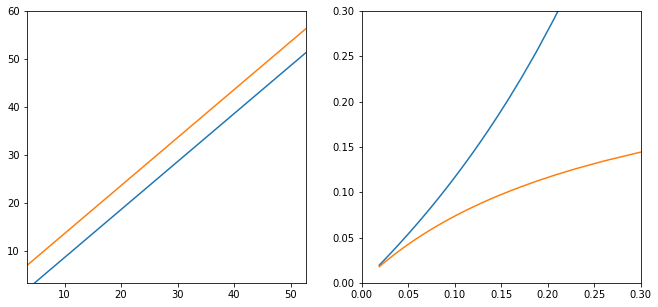

In [333]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,5))

ax1.plot(*inv_contour1.T)
ax1.plot(*inv_contour2.T)
ax2.plot(*1/inv_contour1.T)
ax2.plot(*1/inv_contour2.T)

ax1.set_xlim(1/0.3,52.7)
ax1.set_ylim(1/0.3,60)

ax2.set_xlim(0,0.3)
ax2.set_ylim(0,0.3)

In [324]:
Nd = 3

n_dq = 5

n_fermion = np.array([
    [0,7,0,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd)

Text(0, 0.5, '$\\alpha^{-1}$')

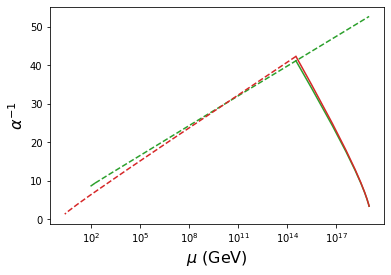

In [325]:
alphas_UV = [0.3, 0.3]
L, M = MC.Lambda_dQCD_M(alphas_UV)

fig, ax = plt.subplots()

EFT5_evol_s = MC.EFT5.coupling_evolution([cn.alpha_s_MZ, 0], cn.MZ, cn.mt)
alpha_s_mt = EFT5_evol_s.y[0][-1]
EFT6_evol_s = MC.EFT6.coupling_evolution([alpha_s_mt, 0], cn.mt, cn.mu_UV)
UV_evol = MC.UV.coupling_evolution(alphas_UV, cn.mu_UV, M)
alpha_d_M = UV_evol.y[1][-1]
EFT_evol_d = MC.EFT6.coupling_evolution([0, alpha_d_M], M, L)

ax.plot(np.exp(UV_evol.t), 1/UV_evol.y[0], 'C2')
ax.plot(np.exp(UV_evol.t), 1/UV_evol.y[1], 'C3')
ax.plot(np.exp(EFT5_evol_s.t), 1/EFT5_evol_s.y[0], 'C2--')
ax.plot(np.exp(EFT6_evol_s.t), 1/EFT6_evol_s.y[0], 'C2--')
ax.plot(np.exp(EFT_evol_d.t), 1/EFT_evol_d.y[1], 'C3--')

ax.set_xscale('log')

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=16)
ax.set_ylabel(r'$\alpha^{-1}$', fontsize=16)

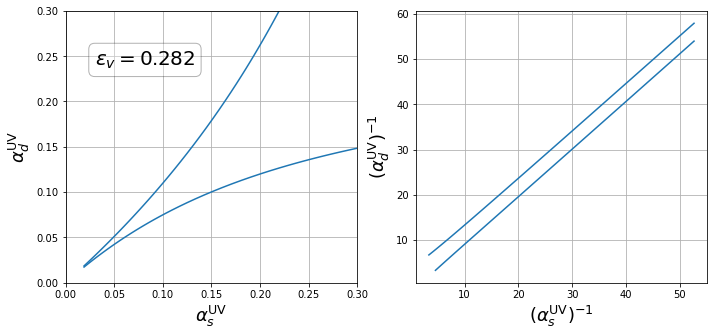

In [328]:
aUV_low = MC.alphas_UV_low
aUV_high = MC.alphas_UV_high
eps_v = MC.epsilon_v

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11.5,5))

ax1.plot(*aUV_low.T, 'C0')
ax1.plot(*aUV_high.T, 'C0')

ax1.set_xlim(0, 0.3)
ax1.set_ylim(0, 0.3)

ax1.set_xlabel(r'$\alpha_s^\mathrm{UV}$', fontsize = 18)
ax1.set_ylabel(r'$\alpha_d^\mathrm{UV}$', fontsize = 18)

ax1.text(0.03, 0.24, f'$\epsilon_v = $' + f'{eps_v:.3f}', fontsize=20, bbox = dict(boxstyle='round', fc='white', ec='black', alpha=0.3))

ax1.grid()

ax2.plot(*1/aUV_low.T, 'C0')
ax2.plot(*1/aUV_high.T, 'C0')

# ax2.plot([0,50], [c1,m1*50+c1], 'k--')
# ax2.plot([0,50], [c2,m2*50+c2], 'k--')

# ax2.set_xlim(1/0.3, 10)
# ax2.set_ylim(1/0.3, 10)

ax2.set_xlabel(r'$(\alpha_s^\mathrm{UV})^{-1}$', fontsize = 18)
ax2.set_ylabel(r'$(\alpha_d^\mathrm{UV})^{-1}$', fontsize = 18)

ax2.grid()

In [322]:
m1, c1 = np.polyfit(*1/aUV_low.T, 1)
m2, c2 = np.polyfit(*1/aUV_high.T, 1)

m1, m2, c1, c2, c1-c2

(1.106171874480121,
 1.1093502463284548,
 19.364952262033412,
 13.882382074900322,
 5.48257018713309)

In [323]:
A,_,_,D,_,_ = MC.UV.coeffs
A0,_,_,D0,_,_ = [-c for c in MC.EFT6.coeffs]
A, D, A0, D0

(2.8647889756541156, 2.9708922710487133, 1.1140846016432675, 1.644601078616252)

m

In [266]:
m = (D0+D)/(A0+A)
D0+D, A0+A, m

(4.615493349664965, 3.9788735772973833, 1.1600000000000001)

c1 - c2

In [267]:
D0, np.log(5/0.2), D0*np.log(5/0.2)

(1.644601078616252, 3.2188758248682006, 5.29376665351002)

c

In [269]:
a = A0*np.log(cn.MZ) + A*np.log(cn.mu_UV) - 1/cn.alpha_s_MZ
A0*np.log(cn.MZ), A*np.log(cn.mu_UV), -1/cn.alpha_s_MZ, a

(5.027924967207888, 125.33198740838213, -8.525876033762469, 121.83403634182756)

In [270]:
m*a

141.32748215651998

In [271]:
4/np.pi, (-D0*np.log(cn.LdQCD_low), -D0*np.log(cn.LdQCD_high)), -D*np.log(cn.mu_UV), 4/np.pi -D0*np.log(cn.LdQCD_low) -D*np.log(cn.mu_UV)

(1.2732395447351628,
 (2.64688332675501, -2.64688332675501),
 -129.97391286795187,
 -126.05378999646169)

In [273]:
m*a + 4/np.pi -D0*np.log(cn.LdQCD_low) -D*np.log(cn.mu_UV)

15.273692160058289

M

In [198]:
f'{np.exp((1/0.2 + a)/(A0+A)):.3e}'

'6.982e+13'

In [197]:
L, M = MC.Lambda_dQCD_M([0.2, 0])

f'{M:.3e}'

'2.301e+14'

In [274]:
141.3/128.3

1.1013250194855806

In [277]:
D0*np.log(cn.LdQCD_high) + D*np.log(cn.mu_UV)

132.62079619470688

In [284]:
1/0.3, 1/cn.alpha_s_MZ, A0*np.log(cn.MZ), A*np.log(cn.mu_UV), A + A0

(3.3333333333333335,
 8.525876033762469,
 5.027924967207888,
 125.33198740838213,
 3.9788735772973833)

In [286]:
1/0.3, 4/np.pi, D0*np.log(cn.LdQCD_low), D*np.log(cn.mu_UV), D + D0

(3.3333333333333335,
 1.2732395447351628,
 -2.64688332675501,
 129.97391286795187,
 4.615493349664965)

In [307]:
2/3/2/np.pi*A*np.log(cn.mu_UV)*(D0+D)/(A0+A)**2

3.876936143832621

In [306]:
A*np.log(cn.mu_UV)*(D0+D)/(A0+A)**2

36.53926232370391